In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Make a model which predicts the CV (log value) based on numeric variables in the dataset

In [2]:
df = pd.read_csv("full_dataset.csv", index_col=0)

In [3]:
df.head(5)

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Census Results,NZDep2018,CV log
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0,13.774689
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0,14.038654
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0,14.038654
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0,13.514405
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0,13.353475


Confirm no NaN values

In [4]:
df.isnull().values.any()

False

In [5]:
df.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Census Results,NZDep2018,CV log
count,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073264,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749,13.954892
std,1.169412,0.992044,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471,0.566489
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,12.506177
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000,13.567049
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000,13.892472
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000,14.285514
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000,16.705882


In [6]:
df.dtypes

Bedrooms            int64
Bathrooms         float64
Address            object
Land area           int64
CV                  int64
Latitude          float64
Longitude         float64
SA1                 int64
0-19 years          int64
20-29 years         int64
30-39 years         int64
40-49 years         int64
50-59 years         int64
60+ years           int64
Suburbs            object
Census Results      int64
NZDep2018         float64
CV log            float64
dtype: object

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

## Linear Regression

In [8]:
X = df.drop(['Address', 'Suburbs', 'CV', 'CV log'], axis=1)
y = df['CV log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lr_model.coef_

array([ 1.58593639e-02,  1.54844640e-01,  1.29003705e-05, -1.00211867e-02,
       -1.48352644e-02, -5.79161993e-06, -3.12293284e-03,  4.36500937e-04,
       -7.14361619e-03, -1.25153011e-03,  4.51059163e-03,  7.15545305e-04,
        1.24680621e-03, -7.14309704e-02])

In [11]:
lr_pred = lr_model.predict(X_test)


Text(0.5, 1.0, 'Predicted Values')

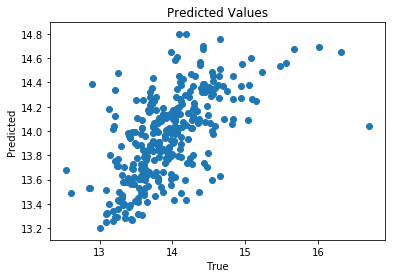

In [12]:
plt.scatter(y_test, lr_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title("Predicted Values")

In [17]:
lr_model.score(X_test, y_test)

0.37170430512239716

## Random Forest

In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
rf_pred = rf_model.predict(X_test)

Text(0.5, 1.0, 'Predicted Values - RF')

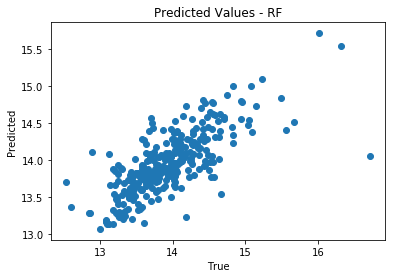

In [15]:
plt.scatter(y_test, rf_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title("Predicted Values - RF")

In [16]:
rf_model.score(X_test, y_test)

0.5592118909209853

#### Second model - LR

In [19]:
X2 = df.drop(['Address', 'Suburbs', 'CV', 'CV log', 'NZDep2018'], axis=1)
y2 = df['CV log']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


In [20]:
lr_model2 = LinearRegression()
lr_model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr_y2_pred = lr_model2.predict(X2_test)

Text(0.5, 1.0, 'Predicted Values LR - NZDep2018 Excluded')

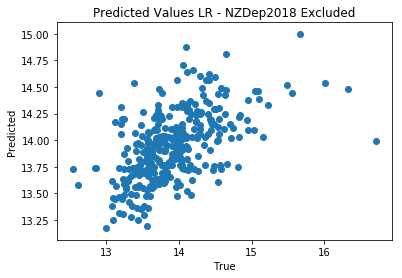

In [22]:
plt.scatter(y2_test, lr_y2_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title("Predicted Values LR - NZDep2018 Excluded")

In [23]:
lr_model2.score(X2_test, y2_test)

0.29126688551880464

#### Second model - RF

In [24]:
rf_model2 = RandomForestRegressor()
rf_model2.fit(X2_train, y2_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
rf_y2_pred = rf_model2.predict(X2_test)

Text(0.5, 1.0, 'Predicted Values RF - NZDep2018 Excluded')

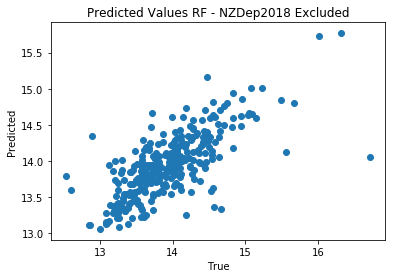

In [26]:
plt.scatter(y2_test, rf_y2_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title("Predicted Values RF - NZDep2018 Excluded")

In [27]:
rf_model2.score(X2_test, y2_test)

0.5231139972273585